In [3]:
# making drive connection
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/project')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [5]:
df1  = pd.read_csv('scopusdata.csv')

In [12]:
frames = [df1]
df = pd.concat(frames)

In [15]:
df['Year'].unique()


array([2020, 2021, 2022, 2023])

In [ ]:
df


Authors  \
0     Chowdhury M.E.H.; Rahman T.; Khandakar A.; Maz...   
1                           Wu X.; Sahoo D.; Hoi S.C.H.   
2     Wu Z.; Pan S.; Chen F.; Long G.; Zhang C.; Yu ...   
3                 Cui Z.; Henrickson K.; Ke R.; Wang Y.   
4                          Li J.; Sun A.; Han J.; Li C.   
...                                                 ...   
9995  Alsunbuli B.N.; Fakhruldeen H.F.; Ismail W.; M...   
9996           Javeed D.; Gao T.; Khan M.T.; Shoukat D.   
9997           Liu H.; Liu T.; Chen Y.; Zhang Z.; Li Y.   
9998       Sadeghi Eshkevari S.; Cronin L.; Pakzad S.N.   
9999                Rajan K.; Zielesny A.; Steinbeck C.   

                                      Author full names  \
0     Chowdhury, Muhammad E. H. (8964151000); Rahman...   
1     Wu, Xiongwei (57212210107); Sahoo, Doyen (5635...   
2     Wu, Zonghan (57211741932); Pan, Shirui (555227...   
3     Cui, Zhiyong (57189374758); Henrickson, Kristi...   
4     Li, Jing (56609767400); Sun, Aixin (7202552214...   
...                                                 ...   
9995  Alsunbuli, Bushra N. (57261795900); Fakhruldee...   
9996  Javeed, Danish (57216501078); Gao, Tianhan (35...   
9997  Liu, Hai (57224917932); Liu, Tingting (5655894...   
9998  Sadeghi Eshkevari, Soheil (57211514162); Croni...   
9999  Rajan, Kohulan (57219383871); Zielesny, Achim ...   

                                           Author(s) ID  \
0     8964151000; 57216883687; 36053012700; 66028486...   
1                  57212210107; 56355278800; 8710996600   
2     57211741932; 55522732400; 57211266037; 5552299...   
3     57189374758; 56734319300; 57189377767; 3519495...   
4     56609767400; 7202552214; 57189214315; 48761579500   
...                                                 ...   
9995  57261795900; 57204682541; 16021900400; 2444823...   
9996  57216501078; 35965583600; 57226797260; 5745206...   
9997  57224917932; 56558943300; 57222261288; 5645089...   
9998              57211514162; 57219793581; 18038101800   
9999               57219383871; 55885490100; 7003655166   

                                                 Titles  Year  \
0     Can AI Help in Screening Viral and COVID-19 Pn...  2020   
1     Recent advances in deep learning for object de...  2020   
2       A Comprehensive Survey on Graph Neural Networks  2021   
3     Traffic Graph Convolutional Recurrent Neural N...  2020   
4     A Survey on Deep Learning for Named Entity Rec...  2022   
...                                                 ...   ...   
9995  Hybrid beamforming with relay and dual-base st...  2022   
9996  A Hybrid Intelligent Framework to Combat Sophi...  2022   
9997  EHPE: Skeleton Cues-based Gaussian Coordinate ...  2022   
9998  Input estimation of nonlinear systems using pr...  2022   
9999  DECIMER 1.0: deep learning for chemical image ...  2021   

                                           Source title Volume Issue Art. No.  \
0                                           IEEE Access      8   NaN  9144185   
1                                        Neurocomputing    396   NaN      NaN   
2     IEEE Transactions on Neural Networks and Learn...     32     1  9046288   
3     IEEE Transactions on Intelligent Transportatio...     21    11  8917706   
4     IEEE Transactions on Knowledge and Data Engine...     34     1      NaN   
...                                                 ...    ...   ...      ...   
9995               Computers and Electrical Engineering    100   NaN   107953   
9996                                            Sensors     22     4     1582   
9997                    IEEE Transactions on Multimedia    NaN   NaN      NaN   
9998           Mechanical Systems and Signal Processing    166   NaN   108368   
9999                         Journal of Cheminformatics     13     1       61   

     Page start  ... ISBN  CODEN   PubMed ID  Language of Original Document  \
0        132665  ...  NaN    NaN         NaN                        English   
1        

In [16]:
df.shape

(10000, 33)

In [18]:
df.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Titles', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'DOI', 'Cited by', 'Link', 'Affiliations',
       'Authors with affiliations', 'Funding Details', 'Funding Texts',
       'Correspondence Address', 'Editors', 'Publisher', 'ISSN', 'ISBN',
       'CODEN', 'PubMed ID', 'Language of Original Document',
       'Abbreviated Source Title', 'Document Type', 'Publication Stage',
       'Open Access', 'Source', 'EID'],
      dtype='object')

In [19]:
pre_process=df[['Authors','Authors with affiliations','Cited by','Year']]
# khud ki ek frame bna li

In [20]:
pre_process.head()

Authors  \
0  Chowdhury M.E.H.; Rahman T.; Khandakar A.; Maz...   
1                        Wu X.; Sahoo D.; Hoi S.C.H.   
2  Wu Z.; Pan S.; Chen F.; Long G.; Zhang C.; Yu ...   
3              Cui Z.; Henrickson K.; Ke R.; Wang Y.   
4                       Li J.; Sun A.; Han J.; Li C.   

                           Authors with affiliations  Cited by  Year  
0  Chowdhury M.E.H., Department of Electrical Eng...       639  2020  
1  Wu X., School of Information System, Singapore...       396  2020  
2  Wu Z., Centre for Artificial Intelligence, Fac...      1906  2021  
3  Cui Z., Department of Civil and Environmental ...       278  2020  
4  Li J., Inception Institute of Artificial Intel...       256  2022

In [21]:
pre_process['Cited by']=pre_process['Cited by'].fillna(0)

In [22]:
pre_process

Authors  \
0     Chowdhury M.E.H.; Rahman T.; Khandakar A.; Maz...   
1                           Wu X.; Sahoo D.; Hoi S.C.H.   
2     Wu Z.; Pan S.; Chen F.; Long G.; Zhang C.; Yu ...   
3                 Cui Z.; Henrickson K.; Ke R.; Wang Y.   
4                          Li J.; Sun A.; Han J.; Li C.   
...                                                 ...   
9995  Alsunbuli B.N.; Fakhruldeen H.F.; Ismail W.; M...   
9996           Javeed D.; Gao T.; Khan M.T.; Shoukat D.   
9997           Liu H.; Liu T.; Chen Y.; Zhang Z.; Li Y.   
9998       Sadeghi Eshkevari S.; Cronin L.; Pakzad S.N.   
9999                Rajan K.; Zielesny A.; Steinbeck C.   

                              Authors with affiliations  Cited by  Year  
0     Chowdhury M.E.H., Department of Electrical Eng...       639  2020  
1     Wu X., School of Information System, Singapore...       396  2020  
2     Wu Z., Centre for Artificial Intelligence, Fac...      1906  2021  
3     Cui Z., Department of Civil and Environmental ...       278  2020  
4     Li J., Inception Institute of Artificial Intel...       256  2022  
...                                                 ...       ...   ...  
9995  Alsunbuli B.N., Engineering Campus, School of ...        13  2022  
9996  Javeed D., Software College, Northeastern Univ...        13  2022  
9997  Liu H., National Engineering Research Center f...        13  2022  
9998  Sadeghi Eshkevari S., Senseable City Laborator...        13  2022  
9999  Rajan K., Institute for Inorganic and Analytic...        13  2021  

[10000 rows x 4 columns]

In [23]:
pre_process.dropna(inplace=True)
pre_process.reset_index(drop=True, inplace=True)

In [24]:
pre_process['Authors with affiliations'][0]

'Chowdhury M.E.H., Department of Electrical Engineering, Qatar University, Doha, Qatar; Rahman T., Department of Biomedical Physics and Technology, University of Dhaka, Dhaka, 1000, Bangladesh; Khandakar A., Department of Electrical Engineering, Qatar University, Doha, Qatar; Mazhar R., Thoracic Surgery, Hamad General Hospital, Doha, Qatar; Kadir M.A., Department of Biomedical Physics and Technology, University of Dhaka, Dhaka, 1000, Bangladesh; Mahbub Z.B., Department of Mathematics and Physics, North South University, Dhaka, 1229, Bangladesh; Islam K.R., Department of Orthodontics, Bangabandhu Sheikh Mujib Medical University, Dhaka, 1000, Bangladesh; Khan M.S., Department of Electrical Engineering (JC), University of Engineering and Technology, Peshawar, 25120, Pakistan, Artificial Intelligence in Healthcare, Intelligent Information Processing Laboratory, National Center for Artificial Intelligence, University of Engineering and Technology, Peshawar, 48550, Pakistan; Iqbal A., Depart

In [25]:
df.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Titles', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'DOI', 'Cited by', 'Link', 'Affiliations',
       'Authors with affiliations', 'Funding Details', 'Funding Texts',
       'Correspondence Address', 'Editors', 'Publisher', 'ISSN', 'ISBN',
       'CODEN', 'PubMed ID', 'Language of Original Document',
       'Abbreviated Source Title', 'Document Type', 'Publication Stage',
       'Open Access', 'Source', 'EID'],
      dtype='object')

In [26]:
pre_process.shape

(9992, 4)

In [27]:
authors=[]
Citation=[]
Year=[]
country=[]
for i in range(9991):
    k=pre_process['Authors with affiliations'][i].split(';')
    for j in range(len(k)):
            m = k[j].split(',')
            if(len(m)>=3):
                auth = m[0]+m[1]
                authors.append(auth.strip())
                con = m[-1]
                country.append(con.strip())
                Year.append(pre_process['Year'][i])
                Citation.append(pre_process['Cited by'][i])

In [30]:
ACCY = pd.DataFrame(list(zip(authors,country,Citation,Year)),columns=['Authors','Country','Citation','Year'])

In [31]:
ACCY.head()

Authors     Country  Citation  \
0  Chowdhury M.E.H. Department of Electrical Engi...       Qatar       639   
1  Rahman T. Department of Biomedical Physics and...  Bangladesh       639   
2  Khandakar A. Department of Electrical Engineering       Qatar       639   
3                         Mazhar R. Thoracic Surgery       Qatar       639   
4  Kadir M.A. Department of Biomedical Physics an...  Bangladesh       639   

   Year  
0  2020  
1  2020  
2  2020  
3  2020  
4  2020

In [32]:
# Created a new dataframe 'auth_info' by first using Group By Authors then extracted total citations for individual author
auth_info = pd.DataFrame(ACCY.groupby('Authors')['Citation'].sum()).reset_index()
auth_info.sort_values(by = 'Citation', ascending=False)

Authors  Citation
36961             Yu P.S. Department of Computer Science      2437
6669                                 Del Ser J. TECNALIA      2150
28291                                  Shazeer N. Google      2127
22984                                   Narang S. Google      2103
17926                                       Li W. Google      2103
...                                                  ...       ...
10722  Gupta B.B. The Department of Computer Engineering        13
13573                  Javeed D. Northeastern University        13
20427  Luo H.-S. National Engineering Research Center...        13
26358      Reghunadhan R. Department of Computer Science        13
38607                       Zhang Y. College of Sciences        13

[40495 rows x 2 columns]

In [33]:
auth_info[auth_info['Citation']==auth_info['Citation'].max()]

Authors  Citation
36961  Yu P.S. Department of Computer Science      2437

In [34]:
h_index = ACCY[ACCY['Authors']=='Yu P.S. Department of Computer Science'][['Authors','Citation']].sort_values(by=['Citation'],ascending=False).reset_index()
h_index.index += 1

In [35]:
h_index

index                                 Authors  Citation
1     19  Yu P.S. Department of Computer Science      1906
2    422  Yu P.S. Department of Computer Science       313
3   1784  Yu P.S. Department of Computer Science       128
4   9828  Yu P.S. Department of Computer Science        48
5  29733  Yu P.S. Department of Computer Science        21
6  30221  Yu P.S. Department of Computer Science        21

In [36]:
h_index[h_index['Citation'] >= h_index.index-5]

index                                 Authors  Citation
1     19  Yu P.S. Department of Computer Science      1906
2    422  Yu P.S. Department of Computer Science       313
3   1784  Yu P.S. Department of Computer Science       128
4   9828  Yu P.S. Department of Computer Science        48
5  29733  Yu P.S. Department of Computer Science        21
6  30221  Yu P.S. Department of Computer Science        21

In [37]:
auth_pub, count = np.unique(ACCY['Authors'], return_counts=True)

In [38]:
auth_pub = list(auth_pub)
count = list(count)

In [39]:
print("Higest Publication Author = ",auth_pub[count.index(max(count))])

Higest Publication Author =  Khan M.A. Department of Computer Science


In [40]:
high_pub = pd.DataFrame({'Author':auth_pub, 'Total Publications':count}).sort_values(by=['Total Publications'], ascending=False)

In [41]:
high_pub.head()

Author  Total Publications
15142           Khan M.A. Department of Computer Science                  40
302    Acharya U.R. Department of Electronics and Com...                  22
27515  Sarkar R. Department of Computer Science and E...                  19
28132     Shankar K. Department of Computer Applications                  18
28208           Sharif M. Department of Computer Science                  15

In [42]:
high_pub[high_pub['Total Publications']== high_pub['Total Publications'].max()]

Author  Total Publications
15142  Khan M.A. Department of Computer Science                  40

In [43]:
tot_citation = auth_info['Citation'].max()
print('Total Citations = ',tot_citation)
tot_publications = 112

Total Citations =  2437


In [44]:
avg_citation = tot_citation/tot_publications
print('Average Citations of Highest Cited Author = ', avg_citation)

Average Citations of Highest Cited Author =  21.758928571428573


In [45]:
country  = ACCY[(ACCY['Authors']=='Yu P.S. Department of Computer Science')]['Country'].iloc[0]
print('Country of Higest Cited Author =',country)

Country of Higest Cited Author = United States


In [46]:
tot_pub_hca = ACCY[ACCY['Authors']=='Yu P.S. Department of Computer Science'].shape[0]
print('Total number of publications of the highest cited author = ',tot_pub_hca)

Total number of publications of the highest cited author =  6


In [47]:
df_tot_pub_per_year = pd.DataFrame(df['Year'].value_counts()).sort_values(by = 'Year').sort_index().reset_index()
df_tot_pub_per_year.rename({'index': 'Year', 'Year' : 'Total Publications in a Year'}, axis=1, inplace= True)
df_tot_pub_per_year

Year  Total Publications in a Year
0  2020                          5056
1  2021                          3784
2  2022                          1131
3  2023                            29

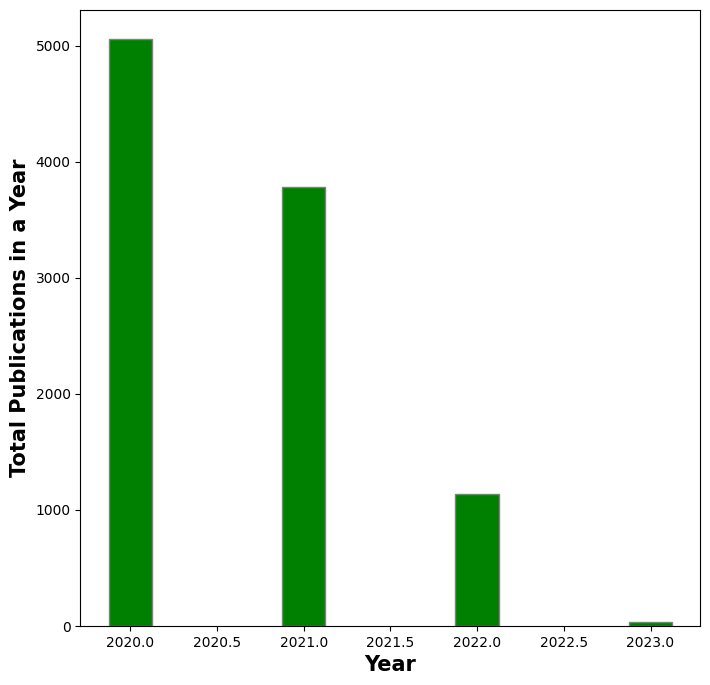

In [48]:
plt.figure(figsize=(8,8))
plt.bar( df_tot_pub_per_year['Year'],df_tot_pub_per_year['Total Publications in a Year'],
        color ='green', width = 0.25, edgecolor ='grey')

plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Publications in a Year', fontweight ='bold', fontsize = 15)

plt.show()

In [49]:
df_tot_cit_per_year = pd.DataFrame(df.groupby('Year')['Cited by'].sum()).sort_values(by = 'Year').sort_index().reset_index()
df_tot_cit_per_year.rename({'Cited by':'Total Citations in a Year'}, axis=1, inplace=True)
df_tot_cit_per_year

Year  Total Citations in a Year
0  2020                     236579
1  2021                     129025
2  2022                      29644
3  2023                        763

In [50]:
plt.figure(figsize=(8,8))
plt.bar(df_tot_cit_per_year['Year'], df_tot_cit_per_year['Total Citations in a Year'],
        color ='blue', width = 0.25, edgecolor ='grey')

plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Total Citations in a Year', fontweight ='bold', fontsize = 15)

plt.show()

In [51]:
def country_name(auth_name):
    if(len(np.asarray(ACCY[ACCY['Authors'] == auth_name]['Country']))==0):
        return 'NaN'
    con  = np.asarray(ACCY[ACCY['Authors'] == auth_name]['Country'])[0]
    return con

In [53]:
dl = df[df['Authors with affiliations'].str.contains('India;',case=False)==True]

auth_lis = []
for i in range(len(dl)):
    p = dl.iloc[i,0].split(';')
    for j in p:
        auth_lis.append(j)

auth, cnt = np.unique(auth_lis, return_counts=True)
x = pd.DataFrame({'Authors':auth, 'Count':cnt})
x = x.sort_values(by = 'Count', ascending=False)

x['Country'] = x['Authors']
x['Country'] = x['Country'].apply(country_name)

x = x[((x['Country'] != 'India;') & (x['Country'] != 'NaN'))]
x

Empty DataFrame
Columns: [Authors, Count, Country]
Index: []

In [67]:
# print('',x.iloc[0,0:1].values[0])
# print(x.iloc[0,2:3].values[0])

<div class="alert alert-block alert-info"><h1 span style="font-size:30px;color:#AA0078;font-weight : bold"> h) Highest cited author from India and their respective University: </span> </div>

In [54]:
ACCY[ACCY['Country']=='India'].groupby('Authors')['Citation'].sum().sort_values(axis=0, ascending=False).reset_index()

Authors  Citation
0     Gupta D. Maharaja Agrasen Institute of Technology      1377
1        Shankar K. Department of Computer Applications       902
2     Khanna A. Maharaja Agrasen Institute of Techno...       881
3                         Bhat M.M. Lelafe IT Solutions       674
4                 Shah J.L. Higher Education Department       674
...                                                 ...       ...
2410           Bhawal S. School of Computer Engineering        13
2411                Singh V. School of Computer Science        13
2412                   Vakharia V. School of Technology        13
2413  Vaichole T.S. School of Computer Science and E...        13
2414  Gupta S. Department of Computer Science Engine...        13

[2415 rows x 2 columns]

In [55]:
print('Higest Cited Author from India : ',ACCY[ACCY['Country']=='India'].groupby('Authors')['Citation'].sum().sort_values(axis=0, ascending=False).reset_index().iloc[0:1,0].values[0])
print('Total Citations : ',ACCY[ACCY['Country']=='India'].groupby('Authors')['Citation'].sum().sort_values(axis=0, ascending=False).reset_index().iloc[0:,1].values[0])

Higest Cited Author from India :  Gupta D. Maharaja Agrasen Institute of Technology
Total Citations :  1377


<div class="alert alert-block alert-info"><h1 span style="font-size:30px;color:#AA0078;font-weight : bold"> i) Comparative year wise article publication analysis of India, China and United States: </span> </div>

In [56]:
df_new = ACCY[(ACCY['Country']== 'India') | (ACCY['Country']== 'China') | (ACCY['Country']== 'United States')]
df_new

Authors        Country  \
19                Yu P.S. Department of Computer Science  United States   
20     Cui Z. Department of Civil and Environmental E...  United States   
21                              Henrickson K. Inrix Inc.  United States   
22     Ke R. Department of Civil and Environmental En...  United States   
23     Wang Y. Department of Civil and Environmental ...  United States   
...                                                  ...            ...   
48116  Chen Y. National Engineering Research Center f...          China   
48117  Zhang Z. National Engineering Research Center ...          China   
48119     Sadeghi Eshkevari S. Senseable City Laboratory  United States   
48120  Cronin L. Department of Civil and Environmenta...  United States   
48121  Pakzad S.N. Department of Civil and Environmen...  United States   

       Citation  Year  
19         1906  2021  
20          278  2020  
21          278  2020  
22          278  2020  
23          278  2020  
...         ...   ...  
48116        13  2022  
48117        13  2022  
48119        13  2022  
48120        13  2022  
48121        13  2022  

[25992 rows x 4 columns]

In [57]:
df_1 = df_new.groupby(['Country','Year'])['Country'].agg(Total_Publications_in_a_Year = 'count').reset_index()
df_1

Country  Year  Total_Publications_in_a_Year
0           China  2020                          8717
1           China  2021                          6231
2           China  2022                          2041
3           China  2023                            72
4           India  2020                          1009
5           India  2021                          1276
6           India  2022                           589
7           India  2023                            16
8   United States  2020                          3281
9   United States  2021                          2311
10  United States  2022                           435
11  United States  2023                            14

<Axes: xlabel='Year', ylabel='Total_Publications_in_a_Year'>

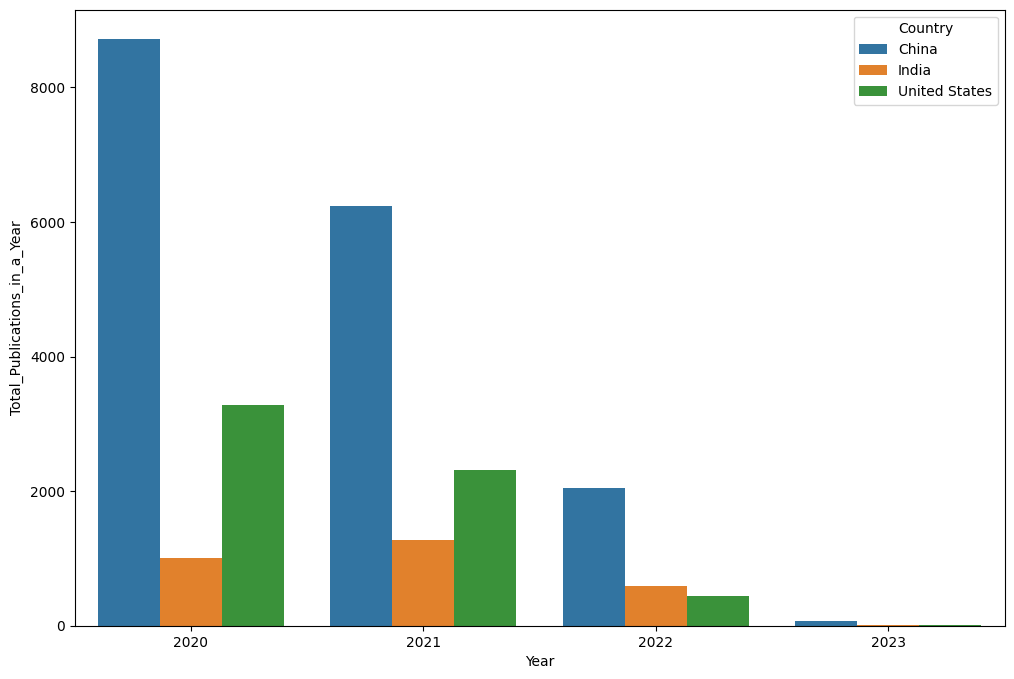

In [58]:

plt.figure(figsize=(12,8))
sns.barplot(x="Year",
           y="Total_Publications_in_a_Year",
           hue="Country",
           data=df_1)

<div class="alert alert-block alert-info"><h1 span style="font-size:30px;color:#AA0078;font-weight : bold"> j) Total number of grants given to the field : </span> </div>

In [59]:
df.loc[:, ['Titles','Funding Details','Authors']]

Titles  \
0     Can AI Help in Screening Viral and COVID-19 Pn...   
1     Recent advances in deep learning for object de...   
2       A Comprehensive Survey on Graph Neural Networks   
3     Traffic Graph Convolutional Recurrent Neural N...   
4     A Survey on Deep Learning for Named Entity Rec...   
...                                                 ...   
9995  Hybrid beamforming with relay and dual-base st...   
9996  A Hybrid Intelligent Framework to Combat Sophi...   
9997  EHPE: Skeleton Cues-based Gaussian Coordinate ...   
9998  Input estimation of nonlinear systems using pr...   
9999  DECIMER 1.0: deep learning for chemical image ...   

                                        Funding Details  \
0     Qatar National Library; Qatar National Researc...   
1                                                   NaN   
2     National Science Foundation, NSF, (1763325, CN...   
3                                                 USDOT   
4                                                   NaN   
...                                                 ...   
9995                                                NaN   
9996  National Natural Science Foundation of China, ...   
9997                                                NaN   
9998  MIT Senseable City Lab Consortium; Pennsylvani...   
9999                                             Google   

                                                Authors  
0     Chowdhury M.E.H.; Rahman T.; Khandakar A.; Maz...  
1                           Wu X.; Sahoo D.; Hoi S.C.H.  
2     Wu Z.; Pan S.; Chen F.; Long G.; Zhang C.; Yu ...  
3                 Cui Z.; Henrickson K.; Ke R.; Wang Y.  
4                          Li J.; Sun A.; Han J.; Li C.  
...                                                 ...  
9995  Alsunbuli B.N.; Fakhruldeen H.F.; Ismail W.; M...  
9996           Javeed D.; Gao T.; Khan M.T.; Shoukat D.  
9997           Liu H.; Liu T.; Chen Y.; Zhang Z.; Li Y.  
9998       Sadeghi Eshkevari S.; Cronin L.; Pakzad S.N.  
9999                Rajan K.; Zielesny A.; Steinbeck C.  

[10000 rows x 3 columns]

In [60]:
print("Total number of grants given to the field of 'Deep learning' are",df1['Funding Details'].notnull().sum())

Total number of grants given to the field of 'Deep learning' are 6993


<div class="alert alert-block alert-info"><h1 span style="font-size:35px;color:#AA1068;font-weight : bold"> k) Country with total number of publication: </span> </div>

In [61]:
cwp = df_new['Country'].value_counts()

In [62]:
cwp

China            17061
United States     6041
India             2890
Name: Country, dtype: int64

In [63]:
plt.figure(figsize=(12,8))
cwp.plot(kind= 'bar', color = 'r')

<Axes: >